<a href="https://colab.research.google.com/github/vedanshu786/ML-project/blob/main/Hand_written.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,Y_train) ,(X_test,Y_test) = keras.datasets.mnist.load_data()

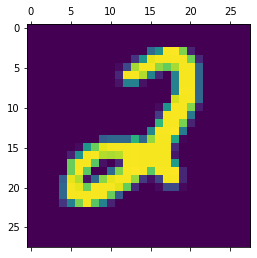

In [ ]:
plt.matshow(X_train[233])

In [ ]:
len(X_test)

10000

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train_flat=X_train.reshape(len(X_train),28*28)
X_test_flat=X_test.reshape(len(X_test),28*28)

In [ ]:
X_train_flat.shape

(60000, 784)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flat,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4705 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9145
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9261


In [ ]:
y_pred = model.predict(X_test_flat)

In [ ]:
y_pred[0]

array([2.2514343e-02, 3.0735157e-07, 6.0992330e-02, 9.5295477e-01,
       1.8231869e-03, 8.7060213e-02, 1.0898638e-06, 9.9971443e-01,
       7.1595043e-02, 5.8319259e-01], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

7

In [ ]:
y_pred_lab = [np.argmax(i) for i in y_pred]

In [ ]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_lab)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    2,    2,    0,    4,    2,    1,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   9,    9,  938,   12,    8,    2,   12,    9,   29,    4],
       [   4,    0,   20,  926,    0,   19,    2,   10,   22,    7],
       [   2,    1,    7,    1,  916,    0,    8,    4,   10,   33],
       [  12,    2,    5,   38,    8,  777,   11,    5,   29,    5],
       [  15,    3,    9,    1,    7,   16,  902,    1,    4,    0],
       [   2,    5,   28,    8,    8,    0,    0,  942,    4,   31],
       [   9,    9,    9,   26,    9,   26,    9,   13,  858,    6],
       [  13,    7,    1,   12,   27,    7,    0,   21,    7,  914]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

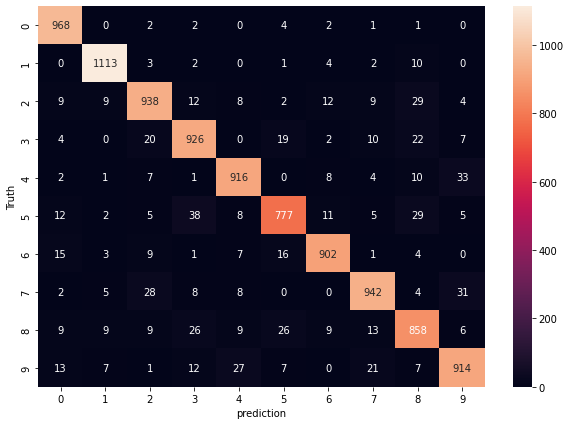

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('prediction')
plt.ylabel('Truth')